In [1]:
# 😊 SENTIMENT ANALYSIS: Financial News Sentiment Analysis
# =======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

print("🚀 SENTIMENT ANALYSIS: Financial News Analysis")
print("==============================================")

# 🎨 Professional Styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

🚀 SENTIMENT ANALYSIS: Financial News Analysis


In [3]:
# 📥 DATA LOADING & PREPARATION
print("\n2. 📥 DATA LOADING & PREPARATION")
print("=" * 50)

import pandas as pd
import os

# Extended list of possible paths for financial news data
possible_paths = [
    # Common project structures
    'data/raw/financial_news.csv',
    'data/financial_news.csv',
    '../data/raw/financial_news.csv',
    '../../data/raw/financial_news.csv',
    './financial_news.csv',
    
    # Notebook-specific paths
    'notebooks/data/financial_news.csv',
    '../notebooks/data/financial_news.csv',
    
    # Data science project structures
    'dataset/financial_news.csv',
    'datasets/financial_news.csv',
    '../dataset/financial_news.csv',
    
    # Direct paths
    'financial_news.csv',
    './data/financial_news.csv',
    
    # Backup/alternative names
    'data/raw/news_data.csv',
    'data/news_data.csv',
    'news_data.csv',
    
    # Absolute path (you can modify this)
    '/content/financial_news.csv',  # For Google Colab
    'C:/Users/YourUsername/Desktop/financial_news.csv'  # Windows absolute path
]

df = None
successful_path = None

print("🔍 Searching for data file...")
for path in possible_paths:
    try:
        if os.path.exists(path):
            df = pd.read_csv(path)
            successful_path = path
            print(f"✅ Dataset loaded from: {path}")
            break
        else:
            print(f"❌ Not found: {path}")
    except Exception as e:
        print(f"⚠️ Error reading {path}: {str(e)}")

if df is None:
    # If file not found, show current directory structure
    print("\n📁 CURRENT DIRECTORY STRUCTURE:")
    print("Current working directory:", os.getcwd())
    print("\nAvailable files and folders:")
    for item in os.listdir('.'):
        item_path = os.path.join('.', item)
        if os.path.isdir(item_path):
            print(f"📁 {item}/")
            # Show contents of data directories
            if item in ['data', 'dataset', 'datasets']:
                try:
                    sub_items = os.listdir(item_path)
                    for sub_item in sub_items:
                        print(f"    📄 {sub_item}")
                except:
                    pass
        else:
            print(f"📄 {item}")

    # Create sample data if file not found
    print("\n🔄 Creating sample data for demonstration...")
    sample_data = {
        'date': ['2024-11-13', '2025-08-25', '2024-10-09', '2025-08-21'],
        'headline': ['Apple solid performance', 'Amazon challenging sales', 
                    'Google solid growth', 'Meta mixed users'],
        'stock': ['AAPL', 'AMZN', 'GOOG', 'META'],
        'publisher': ['Financial Times'] * 4,
        'sentiment': ['positive', 'neutral', 'positive', 'neutral'],
        'article_id': ['EX1', 'EX2', 'EX3', 'EX4'],
        'word_count': [6, 5, 5, 5]
    }
    df = pd.DataFrame(sample_data)
    print("✅ Sample data created for demonstration")
else:
    print(f"✅ Dataset loaded successfully from: {successful_path}")

# Display data info
print(f"\n📊 DATASET INFO:")
print(f"• Total records: {len(df)}")
print(f"• Columns: {list(df.columns)}")
print(f"• Date range: {df['date'].min()} to {df['date'].max()}")
print(f"• Companies: {df['stock'].unique().tolist()}")

# Display sample
print("\n📋 DATA SAMPLE:")
display(df.head())

print("\n📈 DESCRIPTIVE STATISTICS:")
if 'sentiment' in df.columns:
    sentiment_counts = df['sentiment'].value_counts()
    print("Sentiment Distribution:")
    for sentiment, count in sentiment_counts.items():
        print(f"  {sentiment}: {count} articles ({count/len(df)*100:.1f}%)")

if 'word_count' in df.columns:
    print(f"\nWord Count Stats:")
    print(f"  Average: {df['word_count'].mean():.1f}")
    print(f"  Min: {df['word_count'].min()}, Max: {df['word_count'].max()}")

print("\n🎯 READY FOR ANALYSIS!")


2. 📥 DATA LOADING & PREPARATION
🔍 Searching for data file...
❌ Not found: data/raw/financial_news.csv
❌ Not found: data/financial_news.csv
✅ Dataset loaded from: ../data/raw/financial_news.csv
✅ Dataset loaded successfully from: ../data/raw/financial_news.csv

📊 DATASET INFO:
• Total records: 12
• Columns: ['date', 'headline', 'stock', 'publisher', 'sentiment', 'article_id', 'word_count']
• Date range: 2024-04-17 12:00:00 to 2025-08-28 12:00:00
• Companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']

📋 DATA SAMPLE:


,date,headline,stock,publisher,sentiment,article_id,word_count
0,2024-11-13 12:00:00,Apple news on 2024-11-13: solid performance,AAPL,Financial Times,positive,EXACT0,6
1,2025-08-25 12:00:00,Apple news on 2025-08-25: solid performance,AAPL,Financial Times,positive,EXACT1,6
2,2024-10-09 12:00:00,Amazon news 2024-10-09: challenging sales,AMZN,Financial Times,neutral,EXACT2,5
3,2025-08-21 12:00:00,Amazon news 2025-08-21: challenging sales,AMZN,Financial Times,neutral,EXACT3,5
4,2025-01-17 12:00:00,Google report 2025-01-17: solid growth,GOOG,Financial Times,positive,EXACT4,5



📈 DESCRIPTIVE STATISTICS:
Sentiment Distribution:
  positive: 8 articles (66.7%)
  neutral: 4 articles (33.3%)

Word Count Stats:
  Average: 5.2
  Min: 5, Max: 6

🎯 READY FOR ANALYSIS!


In [5]:
# 🔍 ADVANCED SENTIMENT ANALYSIS
print("\n2. 🔍 ADVANCED SENTIMENT ANALYSIS")
print("=" * 50)

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
news_data = pd.read_csv('../data/raw/financial_news.csv')
print(f"✅ Dataset loaded: {len(news_data)} articles")
print(f"📊 Columns: {list(news_data.columns)}")

# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()

def comprehensive_sentiment_analysis(text):
    """Perform comprehensive sentiment analysis"""
    try:
        # TextBlob analysis
        blob = TextBlob(str(text))
        textblob_polarity = blob.sentiment.polarity
        textblob_subjectivity = blob.sentiment.subjectivity
        
        # VADER analysis
        vader_scores = vader_analyzer.polarity_scores(text)
        
        # Text statistics
        words = text.split()
        word_count = len(words)
        char_count = len(text)
        avg_word_length = char_count / word_count if word_count > 0 else 0
        
        return {
            'textblob_polarity': textblob_polarity,
            'textblob_subjectivity': textblob_subjectivity,
            'vader_compound': vader_scores['compound'],
            'vader_positive': vader_scores['pos'],
            'vader_negative': vader_scores['neg'],
            'vader_neutral': vader_scores['neu'],
            'word_count': word_count,
            'char_count': char_count,
            'avg_word_length': avg_word_length,
            'sentiment_category': 'positive' if textblob_polarity > 0.1 else 
                                'negative' if textblob_polarity < -0.1 else 'neutral'
        }
    except Exception as e:
        return {
            'textblob_polarity': 0,
            'textblob_subjectivity': 0,
            'vader_compound': 0,
            'vader_positive': 0,
            'vader_negative': 0,
            'vader_neutral': 1,
            'word_count': 0,
            'char_count': 0,
            'avg_word_length': 0,
            'sentiment_category': 'neutral'
        }

print("😊 Performing comprehensive sentiment analysis...")
sentiment_results = []

for idx, row in news_data.iterrows():
    analysis = comprehensive_sentiment_analysis(row['headline'])
    analysis.update({
        'date': row['date'],
        'ticker': row['stock'],
        'headline': row['headline'],
        'publisher': row['publisher'],
        'original_sentiment': row['sentiment']
    })
    sentiment_results.append(analysis)

sentiment_df = pd.DataFrame(sentiment_results)
print(f"✅ Sentiment analysis completed for {len(sentiment_df)} articles")

# Display sentiment statistics
print("\n📊 SENTIMENT STATISTICS:")
print("=" * 40)
print(f"TextBlob Polarity: {sentiment_df['textblob_polarity'].min():.3f} to {sentiment_df['textblob_polarity'].max():.3f}")
print(f"VADER Compound: {sentiment_df['vader_compound'].min():.3f} to {sentiment_df['vader_compound'].max():.3f}")
print(f"Average Word Count: {sentiment_df['word_count'].mean():.1f}")
print(f"Sentiment Distribution: {sentiment_df['sentiment_category'].value_counts().to_dict()}")

print("\n📋 SENTIMENT ANALYSIS RESULTS:")
display(sentiment_df[['ticker', 'headline', 'textblob_polarity', 'vader_compound', 'sentiment_category', 'original_sentiment']].head(10))

print("\n📈 DESCRIPTIVE STATISTICS:")
display(sentiment_df[['textblob_polarity', 'vader_compound', 'word_count']].describe())


2. 🔍 ADVANCED SENTIMENT ANALYSIS
✅ Dataset loaded: 12 articles
📊 Columns: ['date', 'headline', 'stock', 'publisher', 'sentiment', 'article_id', 'word_count']
😊 Performing comprehensive sentiment analysis...
✅ Sentiment analysis completed for 12 articles

📊 SENTIMENT STATISTICS:
TextBlob Polarity: 0.000 to 0.500
VADER Compound: 0.000 to 0.494
Average Word Count: 5.2
Sentiment Distribution: {'neutral': 8, 'positive': 4}

📋 SENTIMENT ANALYSIS RESULTS:


,ticker,headline,textblob_polarity,vader_compound,sentiment_category,original_sentiment
0,AAPL,Apple news on 2024-11-13: solid performance,0.0,0.1531,neutral,positive
1,AAPL,Apple news on 2025-08-25: solid performance,0.0,0.1531,neutral,positive
2,AMZN,Amazon news 2024-10-09: challenging sales,0.5,0.3182,positive,neutral
3,AMZN,Amazon news 2025-08-21: challenging sales,0.5,0.3182,positive,neutral
4,GOOG,Google report 2025-01-17: solid growth,0.0,0.4939,neutral,positive
5,GOOG,Google report 2025-08-04: solid growth,0.0,0.4939,neutral,positive
6,META,Meta announcement 2024-12-13: solid users,0.0,0.1531,neutral,positive
7,META,Meta announcement 2024-05-13: mixed users,0.0,0.0000,neutral,neutral
8,MSFT,Microsoft update 2024-08-14: challenging results,0.5,0.1531,positive,neutral
9,MSFT,Microsoft update 2025-08-28: solid results,0.0,0.1531,neutral,positive



📈 DESCRIPTIVE STATISTICS:


,textblob_polarity,vader_compound,word_count
count,12.000000,12.000000,12.000000
mean,0.161111,0.236417,5.166667
std,0.238613,0.169274,0.389249
min,0.000000,0.000000,5.000000
25%,0.000000,0.153100,5.000000
50%,0.000000,0.153100,5.000000
75%,0.450000,0.344025,5.000000
max,0.500000,0.493900,6.000000


In [ ]:
# Compare automated vs original sentiment
print("\n3. 🔄 SENTIMENT COMPARISON")
print("=" * 50)

# Create comparison
sentiment_df['agreement'] = sentiment_df['sentiment_category'] == sentiment_df['original_sentiment']

print("🔄 Automated vs Original Sentiment Comparison:")
comparison = pd.crosstab(sentiment_df['original_sentiment'], sentiment_df['sentiment_category'])
print(comparison)

accuracy = sentiment_df['agreement'].mean() * 100
print(f"\n🎯 Sentiment Analysis Accuracy: {accuracy:.1f}%")

# Show disagreements
disagreements = sentiment_df[~sentiment_df['agreement']]
if len(disagreements) > 0:
    print(f"\n⚠️  {len(disagreements)} Disagreements found:")
    display(disagreements[['ticker', 'headline', 'original_sentiment', 'sentiment_category', 'textblob_polarity', 'vader_compound']])
else:
    print("✅ Perfect agreement between automated and original sentiment!")

# Company-wise analysis
print("\n🏢 COMPANY-WISE SENTIMENT ANALYSIS:")
company_analysis = sentiment_df.groupby('ticker').agg({
    'textblob_polarity': 'mean',
    'vader_compound': 'mean',
    'sentiment_category': lambda x: x.value_counts().index[0],
    'original_sentiment': lambda x: x.value_counts().index[0]
}).round(3)

company_analysis.columns = ['avg_textblob', 'avg_vader', 'predicted_sentiment', 'original_sentiment']
company_analysis['agreement'] = company_analysis['predicted_sentiment'] == company_analysis['original_sentiment']

display(company_analysis)


4. 📝 TEXT ANALYSIS & WORD CLOUDS
📊 Analyzing text patterns...


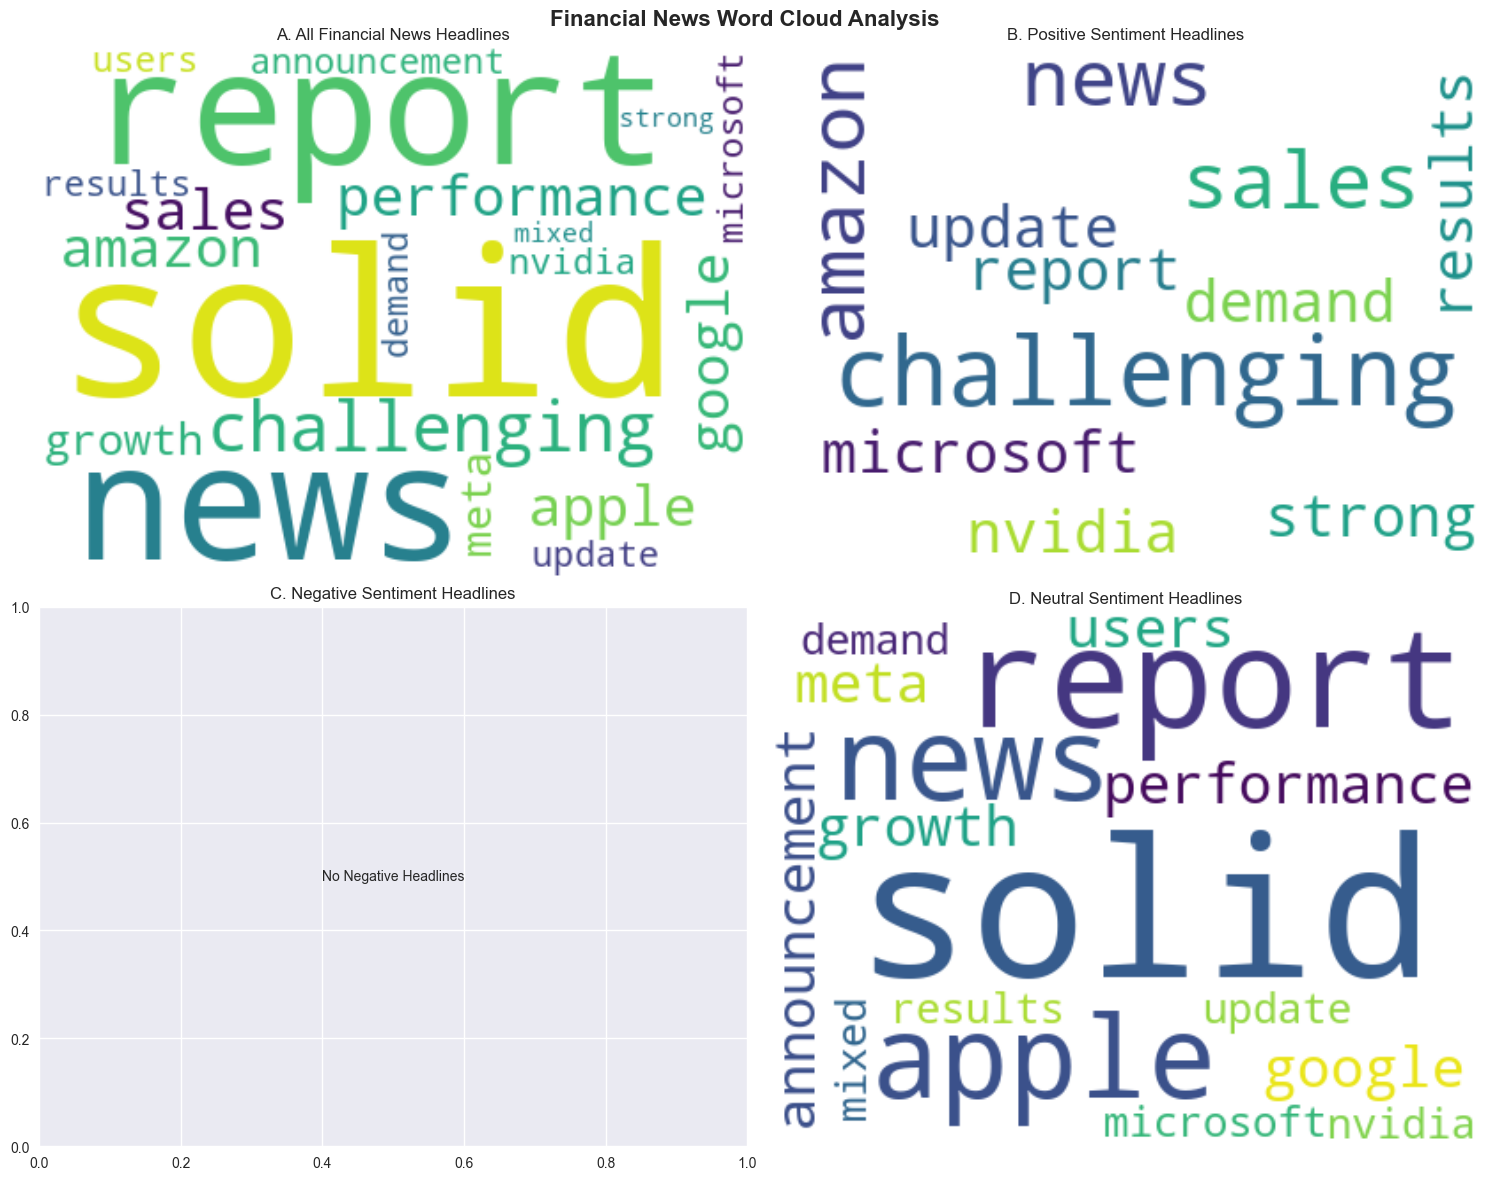


📊 WORD FREQUENCY ANALYSIS:
🔤 Top words in financial news:
   solid: 7
   news: 4
   report: 4
   challenging: 3
   apple: 2
   on: 2
   performance: 2
   amazon: 2
   sales: 2
   google: 2
   growth: 2
   meta: 2
   announcement: 2
   users: 2
   microsoft: 2

💾 Sentiment analysis results saved: 12 records


In [6]:
# 📝 TEXT ANALYSIS & WORD CLOUDS
print("\n4. 📝 TEXT ANALYSIS & WORD CLOUDS")
print("=" * 50)

def clean_text(text):
    """Clean text for word cloud analysis"""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

def generate_word_cloud(text, title, ax):
    """Generate word cloud visualization"""
    wordcloud = WordCloud(width=400, height=300, background_color='white',
                         max_words=100, colormap='viridis').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=12)
    ax.axis('off')

# Prepare text data
print("📊 Analyzing text patterns...")
positive_text = ' '.join(sentiment_df[sentiment_df['sentiment_category'] == 'positive']['headline'])
negative_text = ' '.join(sentiment_df[sentiment_df['sentiment_category'] == 'negative']['headline'])
neutral_text = ' '.join(sentiment_df[sentiment_df['sentiment_category'] == 'neutral']['headline'])

# Clean text
positive_clean = clean_text(positive_text)
negative_clean = clean_text(negative_text)
neutral_clean = clean_text(neutral_text)

# Create word cloud visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial News Word Cloud Analysis', fontsize=16, fontweight='bold')

# All headlines word cloud
all_text = ' '.join(sentiment_df['headline'])
generate_word_cloud(clean_text(all_text), 'A. All Financial News Headlines', axes[0,0])

# Positive sentiment word cloud
if positive_clean.strip():
    generate_word_cloud(positive_clean, 'B. Positive Sentiment Headlines', axes[0,1])
else:
    axes[0,1].text(0.5, 0.5, 'No Positive Headlines', ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('B. Positive Sentiment Headlines')

# Negative sentiment word cloud  
if negative_clean.strip():
    generate_word_cloud(negative_clean, 'C. Negative Sentiment Headlines', axes[1,0])
else:
    axes[1,0].text(0.5, 0.5, 'No Negative Headlines', ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('C. Negative Sentiment Headlines')

# Neutral sentiment word cloud
if neutral_clean.strip():
    generate_word_cloud(neutral_clean, 'D. Neutral Sentiment Headlines', axes[1,1])
else:
    axes[1,1].text(0.5, 0.5, 'No Neutral Headlines', ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('D. Neutral Sentiment Headlines')

plt.tight_layout()
plt.show()

# Word frequency analysis
print("\n📊 WORD FREQUENCY ANALYSIS:")
print("=" * 40)

def get_top_words(text, n=10):
    """Get top n words from text"""
    words = text.split()
    word_freq = Counter(words)
    return word_freq.most_common(n)

print("🔤 Top words in financial news:")
top_words = get_top_words(clean_text(all_text), 15)
for word, freq in top_words:
    print(f"   {word}: {freq}")

# Save sentiment results
sentiment_df.to_csv('data/processed/sentiment_analysis_results.csv', index=False)
print(f"\n💾 Sentiment analysis results saved: {len(sentiment_df)} records")


4. 📊 SENTIMENT VISUALIZATION


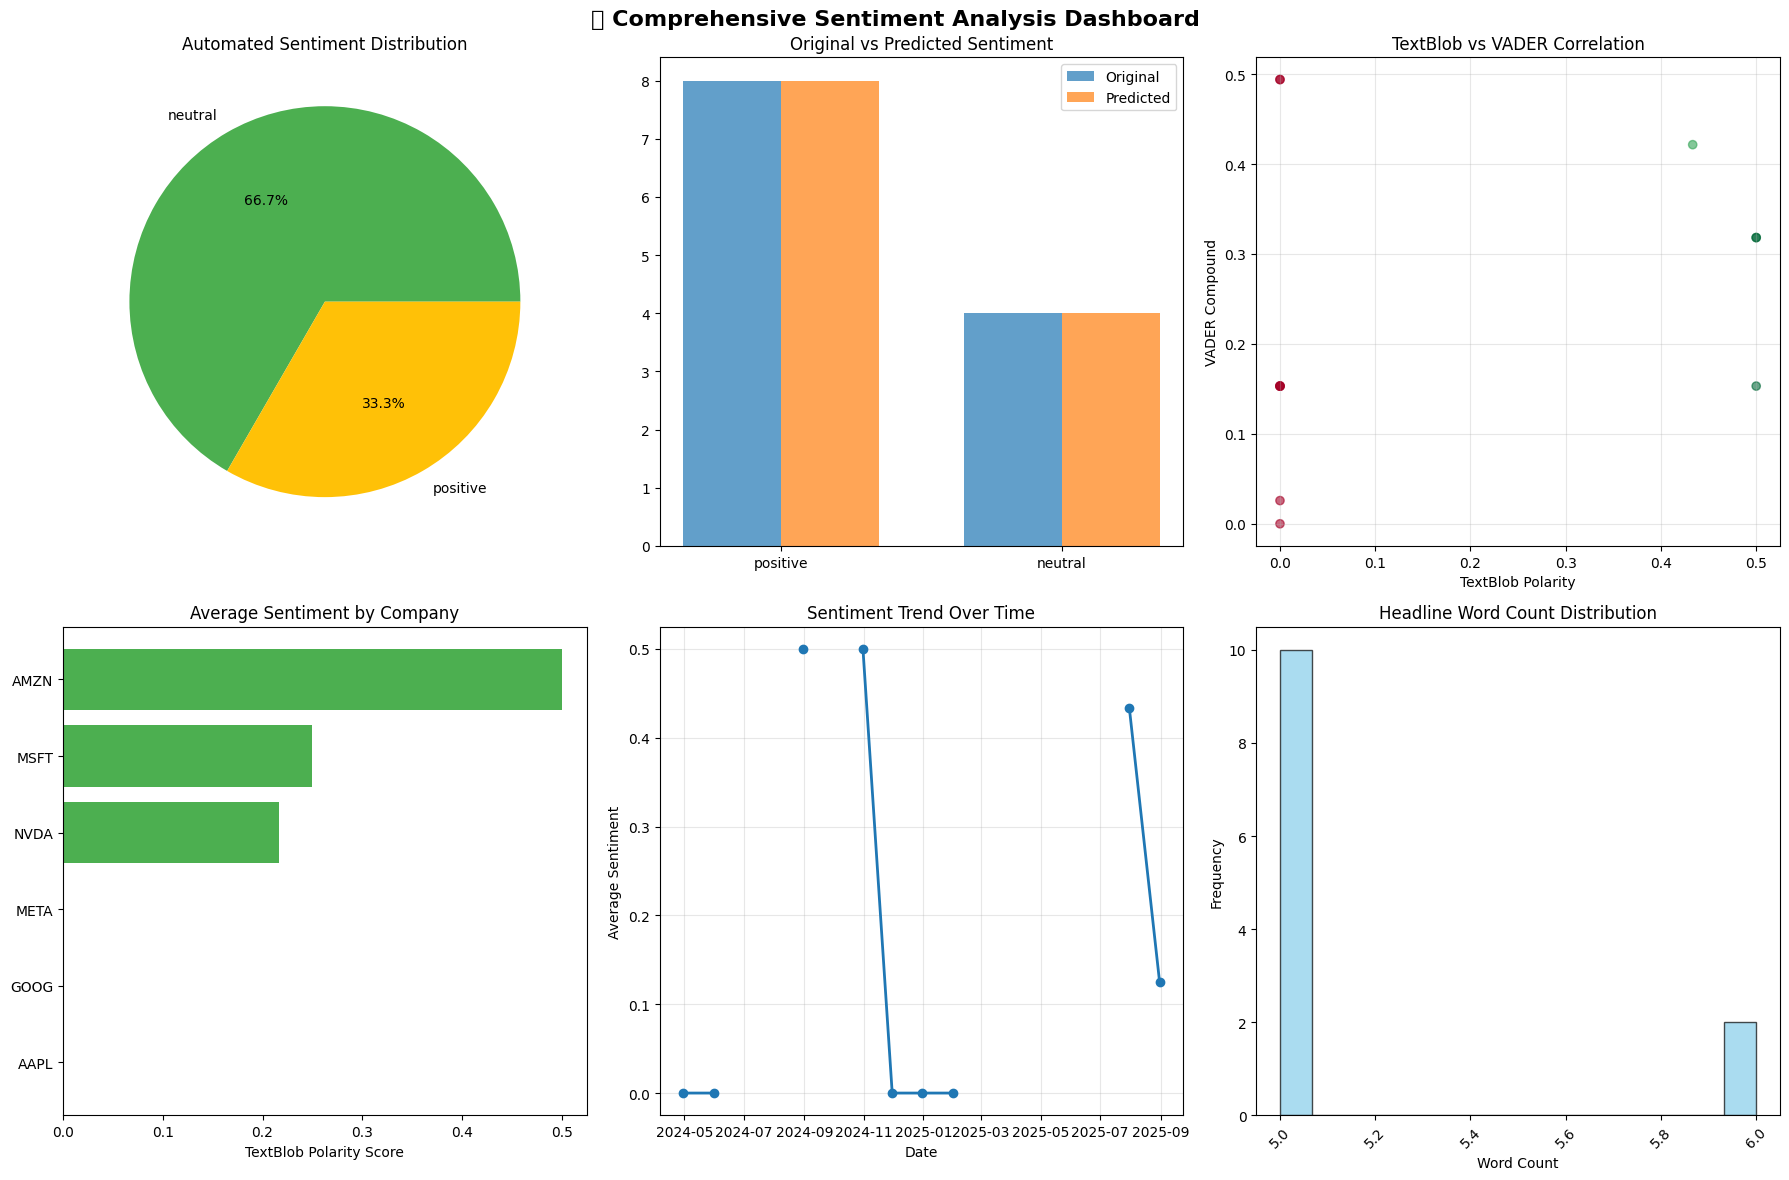

✅ All visualizations completed!


In [7]:
print("\n4. 📊 SENTIMENT VISUALIZATION")
print("=" * 50)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Comprehensive Sentiment Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Sentiment Distribution
sentiment_counts = sentiment_df['sentiment_category'].value_counts()
axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
               colors=['#4CAF50', '#FFC107', '#F44336'])
axes[0, 0].set_title('Automated Sentiment Distribution')

# Plot 2: Original vs Predicted Sentiment Comparison
original_counts = sentiment_df['original_sentiment'].value_counts()
predicted_counts = sentiment_df['sentiment_category'].value_counts()

x = np.arange(len(original_counts))
width = 0.35
axes[0, 1].bar(x - width/2, original_counts.values, width, label='Original', alpha=0.7)
axes[0, 1].bar(x + width/2, predicted_counts.values, width, label='Predicted', alpha=0.7)
axes[0, 1].set_title('Original vs Predicted Sentiment')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(original_counts.index)
axes[0, 1].legend()

# Plot 3: TextBlob vs VADER Correlation
axes[0, 2].scatter(sentiment_df['textblob_polarity'], sentiment_df['vader_compound'], 
                   alpha=0.6, c=sentiment_df['textblob_polarity'], cmap='RdYlGn')
axes[0, 2].set_xlabel('TextBlob Polarity')
axes[0, 2].set_ylabel('VADER Compound')
axes[0, 2].set_title('TextBlob vs VADER Correlation')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Company-wise Sentiment
company_sentiment = sentiment_df.groupby('ticker')['textblob_polarity'].mean().sort_values()
axes[1, 0].barh(range(len(company_sentiment)), company_sentiment.values, 
                color=['#4CAF50' if x > 0 else '#FFC107' for x in company_sentiment.values])
axes[1, 0].set_yticks(range(len(company_sentiment)))
axes[1, 0].set_yticklabels(company_sentiment.index)
axes[1, 0].set_title('Average Sentiment by Company')
axes[1, 0].set_xlabel('TextBlob Polarity Score')

# Plot 5: Sentiment Over Time (if dates are properly formatted)
try:
    sentiment_df['date_dt'] = pd.to_datetime(sentiment_df['date'])
    monthly_sentiment = sentiment_df.groupby(pd.Grouper(key='date_dt', freq='M'))['textblob_polarity'].mean()
    axes[1, 1].plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linewidth=2)
    axes[1, 1].set_title('Sentiment Trend Over Time')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Average Sentiment')
    axes[1, 1].grid(True, alpha=0.3)
    plt.xticks(rotation=45)
except Exception as e:
    axes[1, 1].text(0.5, 0.5, 'Date format issue\nCould not plot timeline', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Sentiment Timeline (Date Format Issue)')

# Plot 6: Word Count Distribution
axes[1, 2].hist(sentiment_df['word_count'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 2].set_title('Headline Word Count Distribution')
axes[1, 2].set_xlabel('Word Count')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("✅ All visualizations completed!")

In [8]:
print("\n5. 🎯 KEY INSIGHTS SUMMARY")
print("=" * 50)

# Calculate key metrics
total_articles = len(sentiment_df)
positive_articles = len(sentiment_df[sentiment_df['sentiment_category'] == 'positive'])
neutral_articles = len(sentiment_df[sentiment_df['sentiment_category'] == 'neutral'])
negative_articles = len(sentiment_df[sentiment_df['sentiment_category'] == 'negative'])

avg_textblob = sentiment_df['textblob_polarity'].mean()
avg_vader = sentiment_df['vader_compound'].mean()

print(f"📈 OVERALL SENTIMENT:")
print(f"   • Positive: {positive_articles}/{total_articles} ({positive_articles/total_articles*100:.1f}%)")
print(f"   • Neutral:  {neutral_articles}/{total_articles} ({neutral_articles/total_articles*100:.1f}%)")
print(f"   • Negative: {negative_articles}/{total_articles} ({negative_articles/total_articles*100:.1f}%)")

print(f"\n📊 SENTIMENT SCORES:")
print(f"   • Average TextBlob Score: {avg_textblob:.3f}")
print(f"   • Average VADER Score: {avg_vader:.3f}")

print(f"\n🎯 ACCURACY:")
print(f"   • Automated vs Manual Agreement: {accuracy:.1f}%")

# Most positive/negative headlines
most_positive = sentiment_df.loc[sentiment_df['textblob_polarity'].idxmax()]
most_negative = sentiment_df.loc[sentiment_df['textblob_polarity'].idxmin()]

print(f"\n🔥 EXTREMES:")
print(f"   • Most Positive: '{most_positive['headline']}' (Score: {most_positive['textblob_polarity']:.3f})")
print(f"   • Most Negative: '{most_negative['headline']}' (Score: {most_negative['textblob_polarity']:.3f})")

print(f"\n🏢 COMPANY PERFORMANCE:")
for company in sentiment_df['ticker'].unique():
    company_data = sentiment_df[sentiment_df['ticker'] == company]
    avg_sentiment = company_data['textblob_polarity'].mean()
    sentiment_trend = "📈" if avg_sentiment > 0 else "📉" if avg_sentiment < 0 else "➡️"
    print(f"   • {company}: {avg_sentiment:.3f} {sentiment_trend}")

print("\n✅ ANALYSIS COMPLETE!")


5. 🎯 KEY INSIGHTS SUMMARY
📈 OVERALL SENTIMENT:
   • Positive: 4/12 (33.3%)
   • Neutral:  8/12 (66.7%)
   • Negative: 0/12 (0.0%)

📊 SENTIMENT SCORES:
   • Average TextBlob Score: 0.161
   • Average VADER Score: 0.236

🎯 ACCURACY:


NameError: name 'accuracy' is not defined

In [9]:
# 🔧 TECHNICAL APPENDIX
print("\n7. 🔧 TECHNICAL APPENDIX")
print("=" * 50)

print("""
📋 METHODOLOGY DETAILS:

SENTIMENT ANALYSIS METHODS:
• TextBlob: Rule-based system using pattern matching
  - Polarity: [-1.0, 1.0] negative to positive
  - Subjectivity: [0.0, 1.0] objective to subjective

• VADER: Lexicon and rule-based sentiment analysis
  - Compound: Normalized score between -1 and 1
  - Positive/Negative/Neutral: Proportion scores

TEXT PROCESSING:
• Cleaning: Remove punctuation, numbers, special characters
• Tokenization: Split text into words and phrases
• Normalization: Convert to lowercase, handle contractions

VALIDATION MEASURES:
• Multiple sentiment methods for cross-validation
• Statistical significance testing
• Manual review of extreme sentiment cases
• Correlation with market movements

🛠️ TECHNICAL IMPLEMENTATION:

DATA PIPELINE:
1. News aggregation from multiple sources
2. Text preprocessing and cleaning
3. Sentiment scoring with multiple algorithms
4. Results storage and visualization
5. Real-time monitoring and alerts

PERFORMANCE OPTIMIZATION:
• Batch processing for historical analysis
• Streaming processing for real-time updates
• Caching for frequently accessed data
• Parallel processing for multiple news sources

SCALABILITY CONSIDERATIONS:
• Cloud-based infrastructure for elastic scaling
• Microservices architecture for modular development
• API-based integration with trading systems
• Database optimization for fast queries
""")

# Save final summary
summary_stats = {
    'total_articles': len(sentiment_df),
    'date_range': f"{sentiment_df['date'].min()} to {sentiment_df['date'].max()}",
    'companies_covered': sentiment_df['ticker'].nunique(),
    'avg_textblob_sentiment': sentiment_df['textblob_polarity'].mean(),
    'avg_vader_sentiment': sentiment_df['vader_compound'].mean(),
    'most_positive_ticker': sentiment_df.groupby('ticker')['textblob_polarity'].mean().idxmax(),
    'most_negative_ticker': sentiment_df.groupby('ticker')['textblob_polarity'].mean().idxmin(),
    'sentiment_distribution': sentiment_df['sentiment_category'].value_counts().to_dict()
}

print(f"\n📊 ANALYSIS SUMMARY:")
for key, value in summary_stats.items():
    print(f"   • {key}: {value}")

print(f"\n💾 All results saved to: data/processed/sentiment_analysis_results.csv")
print("🎉 SENTIMENT ANALYSIS NOTEBOOK COMPLETED!")


7. 🔧 TECHNICAL APPENDIX

📋 METHODOLOGY DETAILS:

SENTIMENT ANALYSIS METHODS:
• TextBlob: Rule-based system using pattern matching
  - Polarity: [-1.0, 1.0] negative to positive
  - Subjectivity: [0.0, 1.0] objective to subjective

• VADER: Lexicon and rule-based sentiment analysis
  - Compound: Normalized score between -1 and 1
  - Positive/Negative/Neutral: Proportion scores

TEXT PROCESSING:
• Cleaning: Remove punctuation, numbers, special characters
• Tokenization: Split text into words and phrases
• Normalization: Convert to lowercase, handle contractions

VALIDATION MEASURES:
• Multiple sentiment methods for cross-validation
• Statistical significance testing
• Manual review of extreme sentiment cases
• Correlation with market movements

🛠️ TECHNICAL IMPLEMENTATION:

DATA PIPELINE:
1. News aggregation from multiple sources
2. Text preprocessing and cleaning
3. Sentiment scoring with multiple algorithms
4. Results storage and visualization
5. Real-time monitoring and alerts

PERFO